In [1]:
import wandb
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [2]:
df_detect = pd.read_csv("2018_detect.csv")[["Name", '''TPR@1%FPR''', "acc", "auc"]]

df_detect["Name"] = df_detect["Name"].map(lambda x: int(x.replace("vae_2018_", "")))
df_detect.head(1)

,Name,TPR@1%FPR,acc,auc
0,8,1.0,1.0,1.0


In [3]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [4]:
quality = df_detect["Name"]
TPR_1_FPR = df_detect["TPR@1%FPR"]
acc = df_detect["acc"]
auc = df_detect["auc"]

In [5]:
detect_metrics = ['''TPR@1%FPR''', "acc", "auc"]
positions = [
    [0, 1], [2, 0], [2, 2]
]

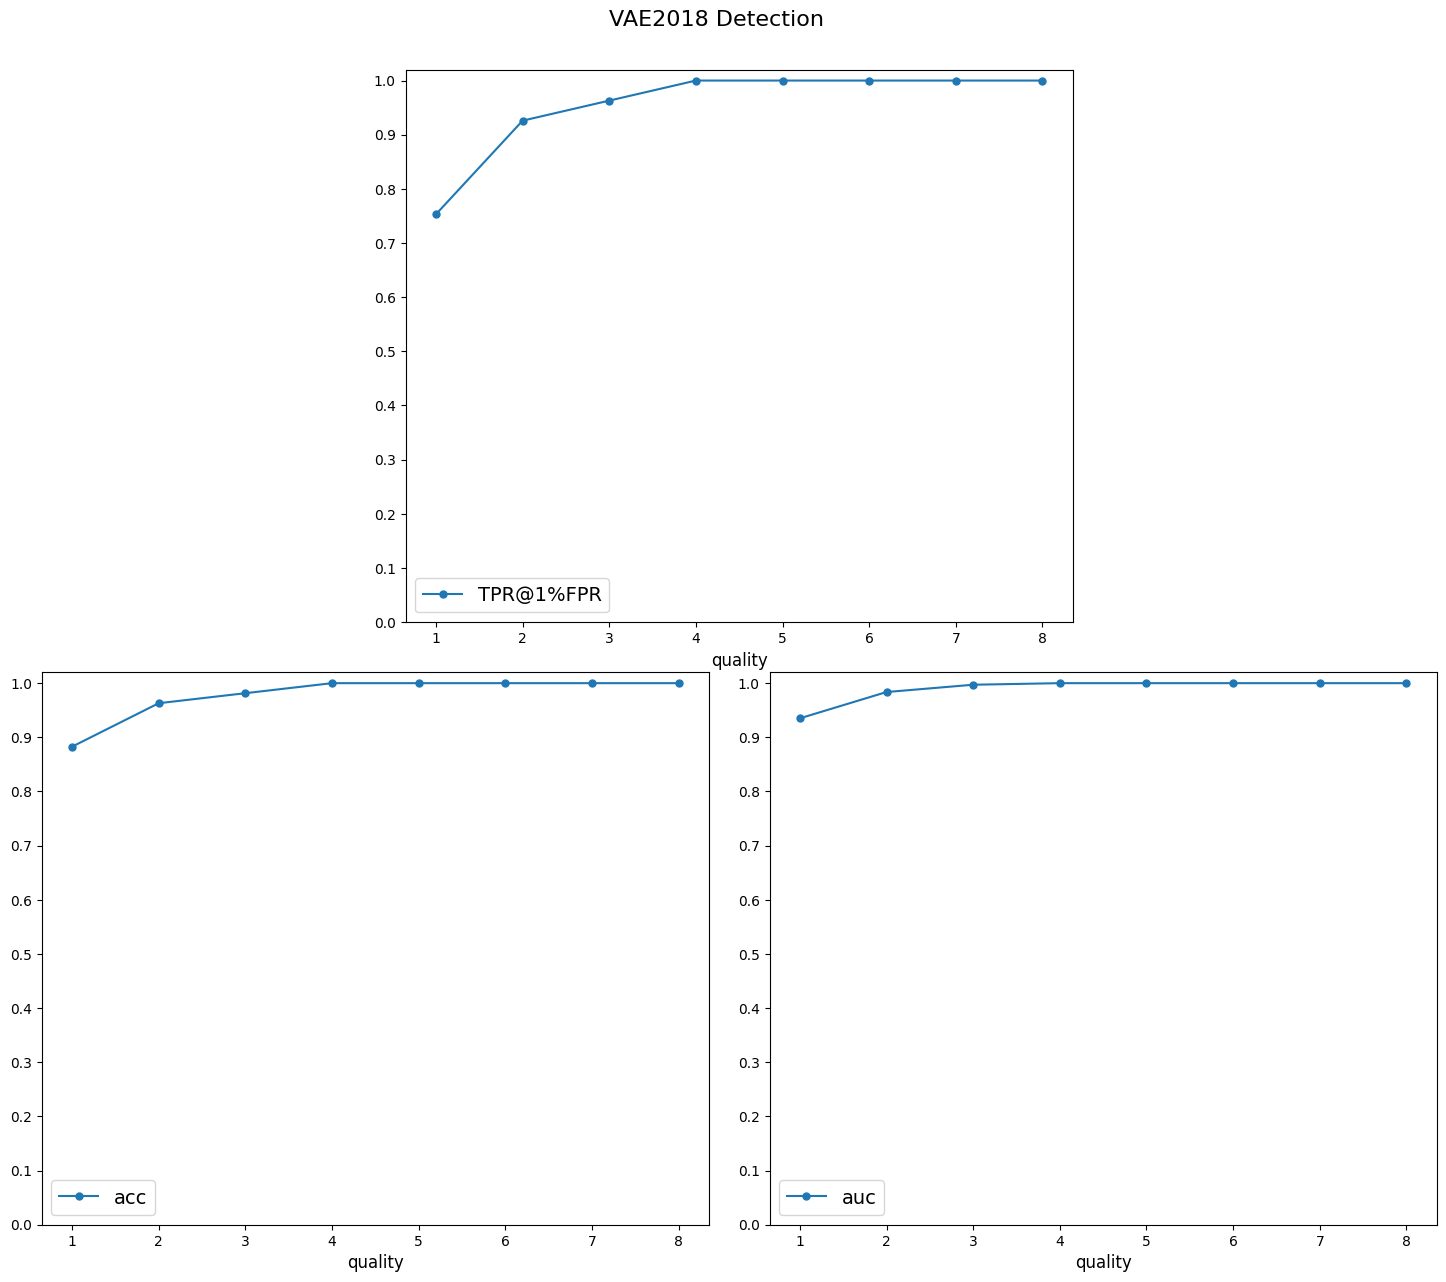

In [6]:
plt.figure(figsize=(18, 15))
plt.suptitle("VAE2018 Detection", fontsize=16, y=0.92)

for metric, pos in zip(detect_metrics, positions):
    plt.subplot2grid((4, 4), pos, rowspan=2, colspan=2)

    plt.plot(
        quality, df_detect[metric], '-o', label=metric, markersize=5
    )

    plt.xticks(
        np.linspace(1, 8, 8)
    )
    plt.yticks(
        np.linspace(0, 1., 11)
    )

    plt.ylim(0, 1.02)
    plt.xlabel("quality", fontsize=12)
    plt.legend(fontsize=14)
# --------

plt.savefig("detection_metrics.png")
None

- в статье по tree-ring использовали fid_gt

---

In [7]:
df_gt = pd.read_csv("2018_gt.csv")[["Name", "fid_no_w", "fid_w", "fid_att_w", "psnr_no_w", "psnr_w", "psnr_att_w", "ssim_no_w", "ssim_w", "ssim_att_w"]]


df_gt["Name"] = df_gt["Name"].map(lambda x: int(x.replace("q_", "")))
df_gt.head(1)

,Name,fid_no_w,fid_w,fid_att_w,psnr_no_w,psnr_w,psnr_att_w,ssim_no_w,ssim_w,ssim_att_w
0,8,25.570274,26.906443,26.906443,8.422959,8.74763,8.757685,0.196561,0.205476,0.206559


In [8]:
image_metrics = ['''fid_att_w''', "psnr_att_w", "ssim_att_w"]
positions = [
    [0, 1], [2, 0], [2, 2]
]

---

In [10]:
df_gen = pd.read_csv("2018_gen.csv")[["Name", "fid_no_w", "fid_w", "fid_att_w", "psnr_no_w", "psnr_w", "psnr_att_w", "ssim_no_w", "ssim_w", "ssim_att_w"]]


df_gen["Name"] = df_gen["Name"].map(lambda x: int(x.replace("q_", "")))
df_gen.head(1)

,Name,fid_no_w,fid_w,fid_att_w,psnr_no_w,psnr_w,psnr_att_w,ssim_no_w,ssim_w,ssim_att_w
0,8,-2.842171e-12,10.480321,10.480321,100,12.742151,12.748013,1,0.47758,0.477813


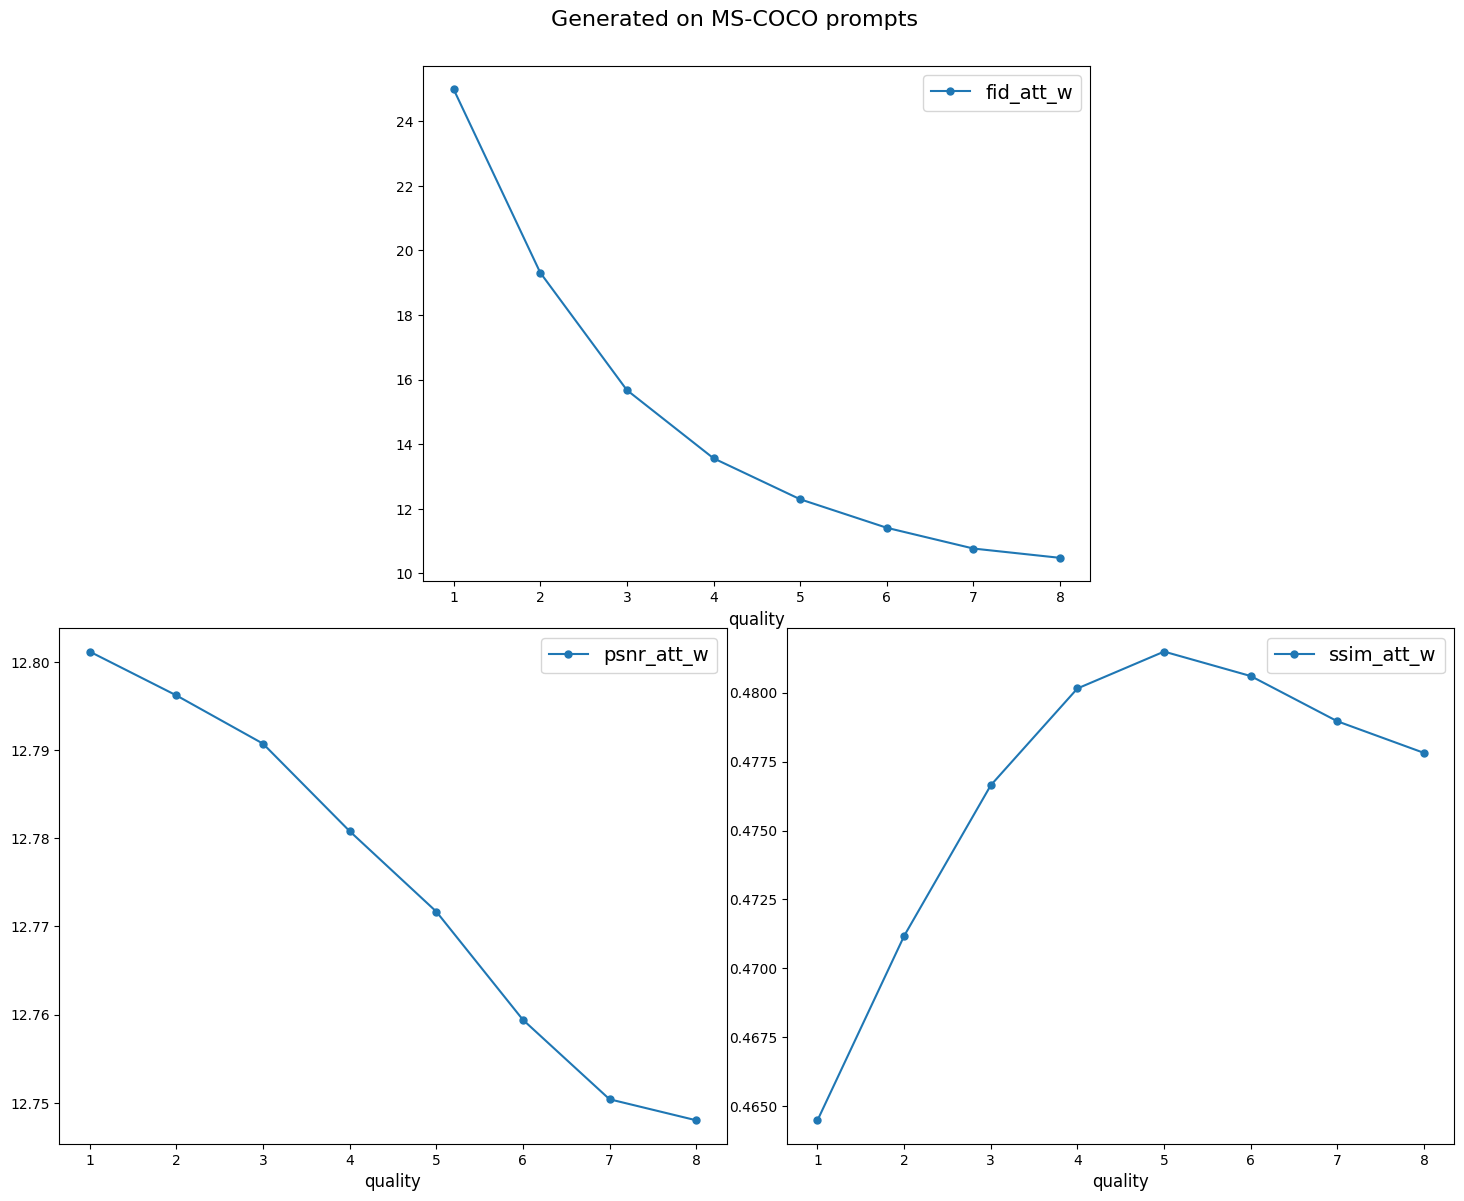

In [11]:
fig, ax = plt.subplot(figsize=(8, 6))

    plt.plot(
        quality, df_gen[metric], '-o', label=metric, markersize=5
    )

    plt.plot(
        quality, df_gt[metric], '-o', label=metric, markersize=5
    )

    plt.xticks(
        np.linspace(1, 8, 8)
    )
    # plt.yticks(
    #     np.linspace(0, 1, 11)
    # )


    plt.xlabel("quality", fontsize=12)
    plt.legend(fontsize=14)
# --------

plt.savefig("gen_ms_coco.png")
None